In [137]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# loading dataste

In [138]:
(x_train,_),(x_test,_) = mnist.load_data()

# display data

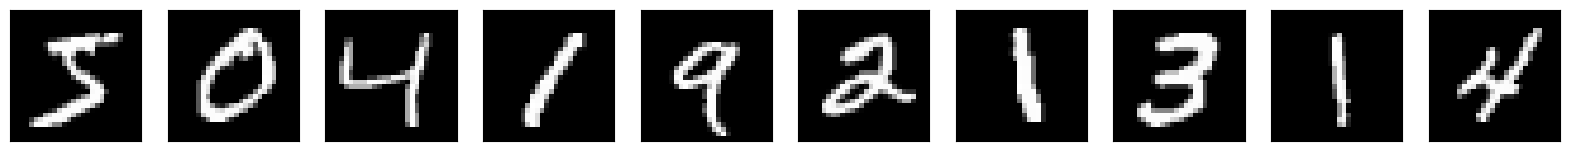

In [139]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_train[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


# perfrom scalling on data

In [140]:
x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# HERE CREATE AUTOENCODER ARCHITECTURE

# Convolutional Autoencoder

In [141]:
# import necessaries
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model

In [142]:
input_layer_en = Input(shape=(28,28,1))
ae_cnv_en = Conv2D(32,(3,3), activation='relu', padding = 'same', kernel_initializer='he_normal')(input_layer_en)
ae_cnv_en = MaxPooling2D((2,2), padding = 'same')(ae_cnv_en)

ae_cnv_en = Conv2D(32, (3,3), activation='relu', padding= 'same')(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en)

ae_cnv_en = Conv2D(4, (3,3), activation= 'relu', padding='same')(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en)

ae_cnv_en = Flatten(name = 'bot')(ae_cnv_en)

ae_cnv_de = Reshape((4,4,4), input_shape = (64,), name ='botnext0')(ae_cnv_en)

ae_cnv_de = Conv2D(4,(3,3), activation='relu', padding='same', name = 'botnext1')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name = 'botnext2')(ae_cnv_de)

ae_cnv_de = Conv2D(32,(3,3), activation='relu', padding='same', name = 'botnext3')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name = 'botnext4')(ae_cnv_de)

ae_cnv_de = Conv2D(32,(3,3), activation='relu', padding='valid', name = 'botnext5')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name = 'botnext6')(ae_cnv_de)

ae_cnv_de = Conv2D(1,(3,3), activation='sigmoid', padding='same', name = 'botnext7')(ae_cnv_de)

Ae_Conv = Model(inputs = input_layer_en, outputs = ae_cnv_de)
Ae_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5),loss='binary_crossentropy', metrics = ['accuracy'])
Ae_Conv.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 7, 7, 4)        │         1,156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 4, 4, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bot (Flatten)                   │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext0 (Reshape)              │ (None, 4, 4, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext1 (Conv2D)               │ (None, 4, 4, 4)        │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext2 (UpSampling2D)         │ (None, 8, 8, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext3 (Conv2D)               │ (None, 8, 8, 32)       │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext4 (UpSampling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext5 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext6 (UpSampling2D)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext7 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,593 (84.35 KB)

 Trainable params: 21,593 (84.35 KB)

 Non-trainable params: 0 (0.00 B)

# reshaping the data

In [143]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [144]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# here training the AutoEncoder

In [145]:
Ae_Conv.fit(
    x_train,
    x_train,
    epochs = 100,
    batch_size = 1024,
    shuffle = True,
    validation_split = 0.2,
    verbose = 2
)

Epoch 1/100
47/47 - 6s - 129ms/step - accuracy: 0.7955 - loss: 0.4414 - val_accuracy: 0.8093 - val_loss: 0.3221
Epoch 2/100
47/47 - 1s - 31ms/step - accuracy: 0.7942 - loss: 0.2696 - val_accuracy: 0.7815 - val_loss: 0.2411
Epoch 3/100
47/47 - 1s - 30ms/step - accuracy: 0.7899 - loss: 0.2337 - val_accuracy: 0.8009 - val_loss: 0.2269
Epoch 4/100
47/47 - 1s - 30ms/step - accuracy: 0.7883 - loss: 0.2230 - val_accuracy: 0.7739 - val_loss: 0.2213
Epoch 5/100
47/47 - 1s - 31ms/step - accuracy: 0.7870 - loss: 0.2162 - val_accuracy: 0.7975 - val_loss: 0.2130
Epoch 6/100
47/47 - 1s - 31ms/step - accuracy: 0.7875 - loss: 0.2112 - val_accuracy: 0.7738 - val_loss: 0.2126
Epoch 7/100
47/47 - 3s - 54ms/step - accuracy: 0.7876 - loss: 0.2071 - val_accuracy: 0.7987 - val_loss: 0.2067
Epoch 8/100
47/47 - 3s - 54ms/step - accuracy: 0.7888 - loss: 0.2034 - val_accuracy: 0.7810 - val_loss: 0.2016
Epoch 9/100
47/47 - 1s - 30ms/step - accuracy: 0.7893 - loss: 0.1995 - val_accuracy: 0.7992 - val_loss: 0.1977


# lets use model and test it

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


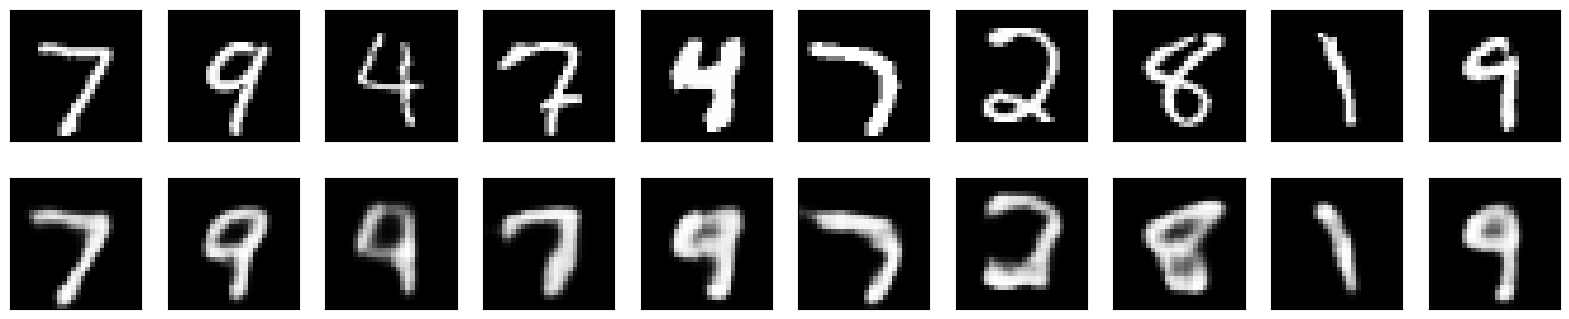

In [146]:
decoded_images = Ae_Conv.predict(x_test)
n =10
k =12
plt.figure(figsize=(20,4))
for i in range(n):
  # here disply orignal images
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # here disply generated images
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_images[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

# here i give picture from my directry to test the model

(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


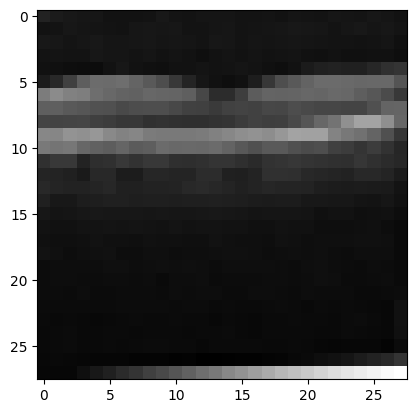

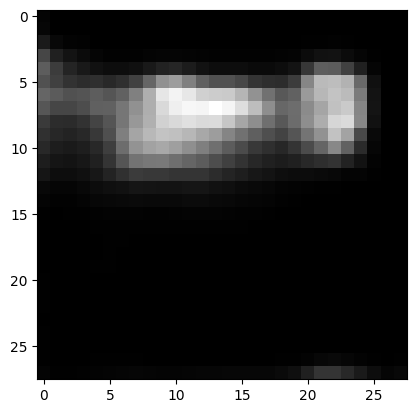

In [147]:
# get this image from for directory and predict it
img = tf.keras.utils.load_img('/content/DRUSEN-11129-3.jpeg', color_mode='grayscale') # Load as grayscale
img = img.resize((28, 28)) # Resize the image
img_array = tf.keras.utils.img_to_array(img)
img_array = img_array / 255.0 # Normalize pixel values
img_array = img_array.reshape(1, 28, 28, 1) # Reshape with batch size and channel
print(img_array.shape)
decoded_images = Ae_Conv.predict(img_array)


plt.imshow(img_array[0].reshape(28,28))
plt.gray()
plt.show()
plt.close()

plt.imshow(decoded_images[0].reshape(28,28))
plt.gray()
plt.show()
plt.close()

# WE CAN CALL OR ACCES ENCODER AND DECODER SEPRATELY AS

> here we acces encoder

In [148]:
ae_conv_encoder = Model(inputs = input_layer_en, outputs = Ae_Conv.get_layer('bot').output, name = 'conv_Ae_Encoder')
ae_conv_encoder.summary()

Model: "conv_Ae_Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 7, 7, 4)        │         1,156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 4, 4, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bot (Flatten)                   │ (None, 64)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,724 (41.89 KB)

 Trainable params: 10,724 (41.89 KB)

 Non-trainable params: 0 (0.00 B)

passing images to encoder

In [149]:
pred_encoder = ae_conv_encoder.predict(x_test)
print(pred_encoder.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 64)


> here access decoder  as

In [150]:
decode_inp_cnv = Input(shape=(64,))
temp_dec = Ae_Conv.get_layer('botnext0')(decode_inp_cnv)
for i in range(1,8):
  s = 'botnext{}'.format(i)
  temp_dec = Ae_Conv.get_layer(s)(temp_dec)
ae_conv_decoder = Model(inputs = decode_inp_cnv, outputs = temp_dec, name = 'conv_Ae_Decoder')
ae_conv_decoder.summary()

Model: "conv_Ae_Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext0 (Reshape)              │ (None, 4, 4, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext1 (Conv2D)               │ (None, 4, 4, 4)        │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext2 (UpSampling2D)         │ (None, 8, 8, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext3 (Conv2D)               │ (None, 8, 8, 32)       │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext4 (UpSampling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext5 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext6 (UpSampling2D)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext7 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,869 (42.46 KB)

 Trainable params: 10,869 (42.46 KB)

 Non-trainable params: 0 (0.00 B)

passing images to decoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 28, 28, 1)


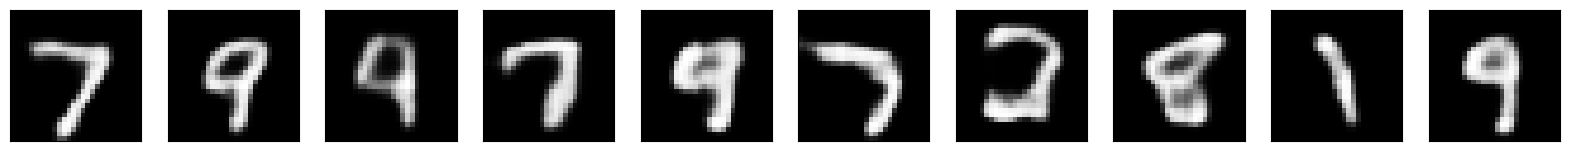

In [151]:
pred_decoder = ae_conv_decoder.predict(pred_encoder)
print(pred_decoder.shape)

# here disply generated images by decoder
n = 10
k = 12
plt.figure(figsize=(20,4))
for i in range(n):
  ax =plt.subplot(2,n,i+1)
  ax.imshow(pred_decoder[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

# DENOISING AUTO ENCODER

> we need noisy data to trained denoise autoencoder so here  we add noise in my mnist loaded data x_train and x_test

In [152]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


>disply noisy data

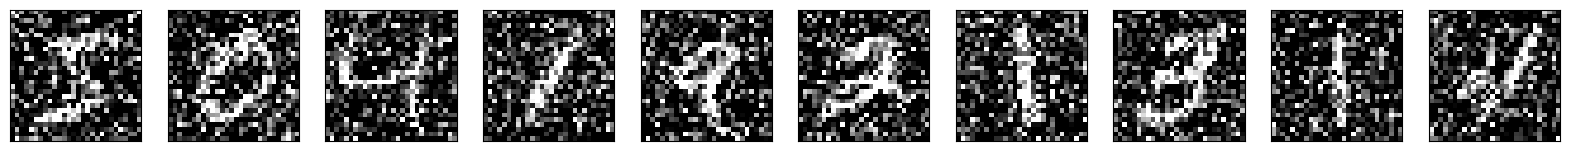

In [153]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  ax.imshow(x_train_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

> ARCHITECTURE OF DENOISING AUTO ENCODER

In [154]:
input_layer_en = Input(shape=(28,28,1))
ae_cnv_en = Conv2D(32,(3,3), activation='relu', padding = 'same', kernel_initializer='he_normal')(input_layer_en)
ae_cnv_en = MaxPooling2D((2,2), padding = 'same')(ae_cnv_en)

ae_cnv_en = Conv2D(32, (3,3), activation='relu', padding= 'same')(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en)

ae_cnv_en = Conv2D(4, (3,3), activation= 'relu', padding='same')(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en)

ae_cnv_en = Flatten(name = 'bot')(ae_cnv_en)

ae_cnv_de = Reshape((4,4,4), input_shape = (64,), name ='botnext0')(ae_cnv_en)

ae_cnv_de = Conv2D(4,(3,3), activation='relu', padding='same', name = 'botnext1')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name = 'botnext2')(ae_cnv_de)

ae_cnv_de = Conv2D(32,(3,3), activation='relu', padding='same', name = 'botnext3')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name = 'botnext4')(ae_cnv_de)

ae_cnv_de = Conv2D(32,(3,3), activation='relu', padding='valid', name = 'botnext5')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name = 'botnext6')(ae_cnv_de)

ae_cnv_de = Conv2D(1,(3,3), activation='sigmoid', padding='same', name = 'botnext7')(ae_cnv_de)

Ae_Conv_denoise = Model(inputs = input_layer_en, outputs = ae_cnv_de)
Ae_Conv_denoise.compile(optimizer=tf.keras.optimizers.Adadelta(0.1,clipvalue=2),loss='binary_crossentropy', metrics = ['accuracy'])
Ae_Conv_denoise.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 7, 7, 4)        │         1,156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 4, 4, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bot (Flatten)                   │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext0 (Reshape)              │ (None, 4, 4, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext1 (Conv2D)               │ (None, 4, 4, 4)        │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext2 (UpSampling2D)         │ (None, 8, 8, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext3 (Conv2D)               │ (None, 8, 8, 32)       │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext4 (UpSampling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext5 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext6 (UpSampling2D)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ botnext7 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,593 (84.35 KB)

 Trainable params: 21,593 (84.35 KB)

 Non-trainable params: 0 (0.00 B)

> train the denoise model

In [155]:
Ae_Conv_denoise.fit(
    x_train_noisy,
    x_train,
    epochs = 100,
    batch_size = 128,
    shuffle = True,
    validation_split = 0.2,
    verbose = 2
)


Epoch 1/100
375/375 - 7s - 19ms/step - accuracy: 0.7575 - loss: 0.3697 - val_accuracy: 0.7937 - val_loss: 0.2495
Epoch 2/100
375/375 - 2s - 6ms/step - accuracy: 0.7910 - loss: 0.2330 - val_accuracy: 0.7894 - val_loss: 0.2229
Epoch 3/100
375/375 - 2s - 6ms/step - accuracy: 0.7893 - loss: 0.2174 - val_accuracy: 0.7893 - val_loss: 0.2139
Epoch 4/100
375/375 - 3s - 7ms/step - accuracy: 0.7904 - loss: 0.2103 - val_accuracy: 0.7912 - val_loss: 0.2080
Epoch 5/100
375/375 - 3s - 8ms/step - accuracy: 0.7914 - loss: 0.2049 - val_accuracy: 0.7933 - val_loss: 0.2032
Epoch 6/100
375/375 - 5s - 13ms/step - accuracy: 0.7924 - loss: 0.2004 - val_accuracy: 0.7944 - val_loss: 0.1990
Epoch 7/100
375/375 - 2s - 7ms/step - accuracy: 0.7935 - loss: 0.1963 - val_accuracy: 0.7978 - val_loss: 0.1960
Epoch 8/100
375/375 - 3s - 7ms/step - accuracy: 0.7946 - loss: 0.1926 - val_accuracy: 0.7965 - val_loss: 0.1914
Epoch 9/100
375/375 - 3s - 7ms/step - accuracy: 0.7956 - loss: 0.1886 - val_accuracy: 0.7934 - val_los

> test the denoise model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


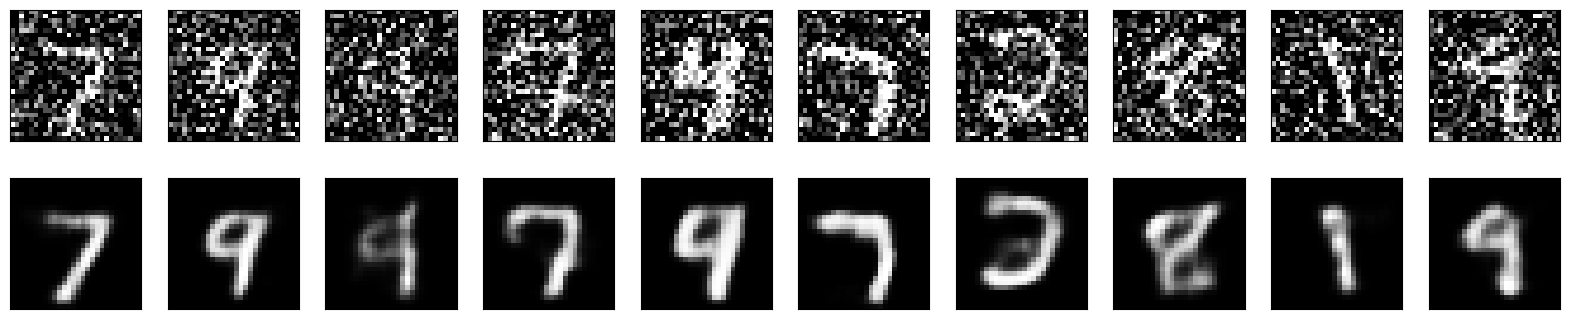

In [156]:
denoised_decoded_images = Ae_Conv_denoise.predict(x_test_noisy)
n = 10
k = 12
plt.figure(figsize=(20,4))
for i in range(n):
  # orignal images
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # denoise images
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(denoised_decoded_images[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()